         likes  shares  total
user_id                      
1024     250.0   120.0  370.0
1037     250.0   120.0  370.0
1047     250.0   120.0  370.0
Hashtags
outdoorfun    27
foodie        26
cozytime      20
adventure     20
goodtimes     20
Name: count, dtype: int64


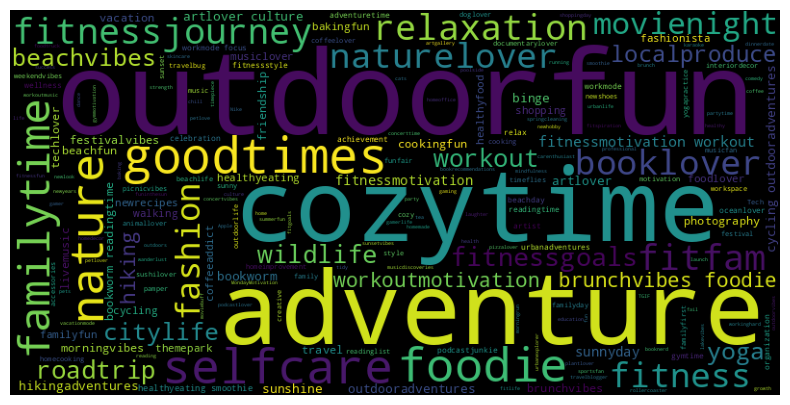

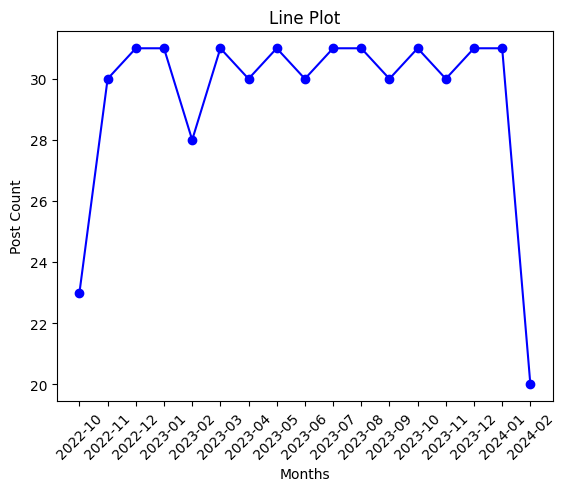

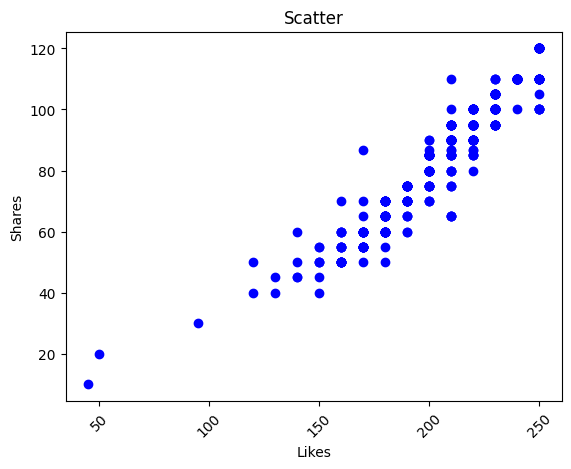

In [7]:
# A-  Data Wrangling
import pandas as pd
import re

#Task 1

data=pd.read_csv('social_media_posts.csv')

data.head()

#first get the patterns:
#NOTE [^] this [] means match any character inside , ^ with it means negates that. So match any character NOT inside
# [^X]+ match everyhting UNTIL a certain char ex) [^@]+ match all until @
# (.*?) for BETWEN things so ex) \[(.*?)\] this is everyhting inside brackets

def clean(text):

  hashtag_pattern=(r'#([\w-]+)')
  mention_pattern=(r'@(\w+)')
  emoji_pattern=r'[^\w\s,]'
  url_pattern=(r'http\S+') #S is non white space chars

  text=str(text)

  text=re.sub(hashtag_pattern, r'\1', text) #macth to whats inside forst parenthesis group
  text=re.sub(mention_pattern, r'\1', text)
  text=re.sub(emoji_pattern, '', text)
  text=re.sub(url_pattern, '', text)

  return text


data['cleaned_post_content']=data['post_content'].apply(clean)

hashtag_pattern=(r'#([\w-]+)')
data['Hashtags']=data['post_content'].str.findall(hashtag_pattern) #so u can use str.findall here



#Task 2
data['post_date']=pd.to_datetime(data['post_date'])

#Task 3:
data.isna().sum()
data['likes']=data['likes'].fillna(data['likes'].median())
data['shares']=data['shares'].fillna(data['shares'].mean())
data['post_content']=data['post_content'].fillna('no text')




#B- Data Analysis

#Task 1

averages=data.groupby('user_id')[['likes','shares']].agg('mean')
averages['total']=averages['likes']+averages['shares']

top_users=averages.sort_values(by='total', ascending=False).head(3) #sort_values for dataframes
print(top_users)

#Task 2
data.head()
all_hashtags=data['Hashtags'].explode() #explode turns lists and turns into rows
popular_topics = all_hashtags.value_counts()
print(popular_topics.head(5))



#C- Sentiment Analysis

#Task 1

from textblob import TextBlob

def sentiment(text):
  sent_num=TextBlob(text).sentiment.polarity
  if sent_num<0:
    return 'Negative'
  elif sent_num>0:
    return 'Positive'
  else:
    return 'Neutral'

data['sentiment']=data['cleaned_post_content'].apply(sentiment)



#Task 2:
data['polarity']=data['cleaned_post_content'].apply(lambda x: TextBlob(x).sentiment.polarity)

post_sentiment=data['sentiment'].value_counts()
post_sentiment

data.head()
avg_sent_user=data.groupby('user_id')['polarity'].mean()
avg_sent_user




#E-Analysis and visualzation


#Task 1
from wordcloud import WordCloud
import matplotlib.pyplot as plt


all_hashtags=data['Hashtags'].dropna().explode() #drop null before exploding
hashtag_str=' '.join(all_hashtags) #join to one big string

wc=WordCloud(width=800, height=400).generate(hashtag_str)
plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.axis('off')
plt.show()

#***Task 2 (line plot of num of posts per month overall)


data.head()
data['year_month']=data['post_date'].dt.to_period('M').astype(str) #monthly period
post_per_month=data.groupby('year_month').size()

x=post_per_month.index
y=post_per_month.values
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.xlabel('Months')
plt.xticks(rotation=45)
plt.ylabel('Post Count')
plt.title('Line Plot')
plt.show()


#Task 3 :
engage_per_post=data.groupby('post_id')[['likes', 'shares']].sum()
plt.scatter(engage_per_post['likes'], y=engage_per_post['shares'], marker='o',  color='b')
plt.xlabel('Likes')
plt.xticks(rotation=45)
plt.ylabel('Shares')
plt.title('Scatter')
plt.show()












In [3]:
data.head()

,user_id,post_id,post_content,likes,shares,post_date,cleaned_post_content,Hashtags,polarity,sentiment,year_month
0,1001,1,Loving the new iPhone! #Apple #Tech https://ap...,120.0,50.0,2024-02-20,Loving the new iPhone Apple Tech,"[Apple, Tech]",0.368182,Positive,2024-02
1,1002,2,no text,95.0,30.0,2024-02-19,nan,NaN,0.000000,Neutral,2024-02
2,1003,3,Check out my new sneakers! #Nike #style 👟,210.0,75.0,2024-02-18,Check out my new sneakers Nike style,"[Nike, style]",0.136364,Positive,2024-02
3,1004,4,Can’t wait to travel again! ✈️ #wanderlust #tr...,180.0,65.0,2024-02-17,Cant wait to travel again wanderlust travel,"[wanderlust, travel]",0.000000,Neutral,2024-02
4,1005,5,What a disaster... didn’t work at all! 😞 #fail,50.0,20.0,2024-02-16,What a disaster didnt work at all fail,[fail],-0.500000,Negative,2024-02


In [9]:
#D) Unit test
import unittest

class TestExtract(unittest.TestCase):
  def test_extract_tags_mention(self):
    sample='#hello how are you @sammy'
    expected_result='hello how are you sammy'
    result=clean(sample)
    print(result)
    self.assertEqual(result, expected_result)


class TestSentiment(unittest.TestCase):
  def test_sentiment(self):
    text='movie was ok'
    expected_result='Neutral'
    result=sentiment(text)
    print(result)
    self.assertEqual(result, expected_result)


class





E
ERROR: /root/ (unittest.loader._FailedTest./root/)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute '/root/'

----------------------------------------------------------------------
Ran 1 test in 0.001s

FAILED (errors=1)


SystemExit: True

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
